In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from itertools import product

In [58]:
CV=['STACK TEMP', 'FW TEMP', 'STEAM TEMP', 'STEAM PR', 
    'SCAPH I/L', 'SCAPH O/L', 'WINDBOX PR', 'FURNACE PR', 'RAPH AIR TEMP', 
    'ECONOMISER T','SOX', 'NOX', 'CO', 
    'SPM', 'O2'
]

manipulated_variables = [
'IFO PR', 'IFO FLOW', 'IFO TEMP', 'GAS FLOW', 'AIR FLOW', 'FW FLOW', 'STEAM FLOW']

In [59]:
df= pd.read_csv("BOILER TAG UB1 INTERN.csv")


In [60]:
df.head(10)
#df.shape

,GAS FLOW,AIR FLOW,FLUE GAS TEMP,FW FLOW,FW TEMP,STEAM FLOW,STEAM PR,STEAM TEMP,SCAPH I/L,SCAPH O/L,...,ECONOMISER T,ECONOMISER P,SOX,NOX,CO,SPM,O2,IFO PR,IFO FLOW,IFO TEMP
0,3876.89,183.06,362.15,123.19,132.24,101.81,41.77,380.75,589.46,318.71,...,132.24,44.77,183.38,152.09,11.93,3.24,16.41,4.55,3.58,112.08
1,3702.66,184.71,362.20,119.92,132.07,100.59,41.82,382.01,597.11,312.61,...,132.07,44.76,183.38,152.15,11.88,0.07,16.41,4.57,3.55,112.08
2,3824.41,185.15,362.49,113.80,132.07,100.74,41.86,382.93,598.95,306.76,...,132.07,44.74,58.33,150.58,11.93,3.24,16.40,4.57,3.58,111.93
3,3846.71,183.89,362.77,111.26,132.07,101.58,41.90,383.41,584.01,310.76,...,132.07,44.79,5.83,149.94,11.93,0.07,16.40,4.58,3.59,111.93
4,3789.22,183.55,363.00,106.23,132.07,102.09,41.94,383.61,594.84,316.68,...,132.07,44.83,2.37,150.81,11.93,3.19,16.40,4.58,3.62,111.86
5,3773.99,182.83,363.28,103.09,132.07,102.88,41.99,383.36,593.00,304.05,...,132.07,44.88,2.62,150.11,11.93,3.19,16.41,4.57,3.58,111.86
6,3754.57,184.46,363.00,110.01,132.07,102.61,42.03,383.03,591.37,313.97,...,132.07,44.95,2.62,151.22,11.88,3.24,16.40,4.55,3.57,111.79
7,3570.98,183.67,361.98,108.54,132.09,101.96,42.07,382.49,597.75,304.60,...,132.09,44.94,2.62,146.69,11.93,3.24,16.38,4.52,3.57,111.79
8,3719.64,181.99,361.75,108.64,132.07,102.91,42.11,382.59,588.54,309.16,...,132.07,45.03,2.37,148.14,11.93,3.24,16.40,4.48,3.76,111.79
9,3539.66,184.77,361.98,113.23,132.05,103.90,42.20,382.73,589.75,314.03,...,132.05,45.17,2.62,151.39,11.88,3.19,16.39,4.44,3.71,111.86


In [61]:

# Check if the number of rows is divisible by 12 for a clean split
assert num_rows % 12 == 0, "Number of rows should be divisible by 12 for a clean split."

# Compute the average of every 12 rows
averaged_df = df.groupby(df.index // 12).mean()

# Reset index if needed
averaged_df.reset_index(drop=True, inplace=True)

# Print or use the averaged DataFrame
averaged_df.head()
for column in averaged_df.columns:
    length = len(averaged_df[column])
    print(f'Length of column {column}: {length}')

Length of column GAS FLOW: 3601
Length of column AIR FLOW: 3601
Length of column FLUE GAS TEMP: 3601
Length of column FW FLOW: 3601
Length of column FW TEMP: 3601
Length of column STEAM FLOW : 3601
Length of column STEAM PR: 3601
Length of column STEAM TEMP: 3601
Length of column SCAPH I/L: 3601
Length of column SCAPH O/L: 3601
Length of column WIND BOX PR: 3601
Length of column FURNACE PR: 3601
Length of column ECONOMISER T: 3601
Length of column ECONOMISER P: 3601
Length of column SOX: 3601
Length of column NOX: 3601
Length of column CO: 3601
Length of column SPM: 3601
Length of column O2: 3601
Length of column IFO PR: 3601
Length of column IFO FLOW: 3601
Length of column IFO TEMP: 3601


In [62]:
# Specify the columns to be used as x-axes and y-axes
x_columns = ['IFO PR', 'IFO FLOW', 'IFO TEMP','GAS FLOW', 'AIR FLOW', 'FW FLOW', 'STEAM FLOW']
y_columns = ['FW TEMP', 'STEAM TEMP', 'STEAM PR', 
             'SCAPH I/L', 'SCAPH O/L', 'WIND BOX PR', 'FURNACE PR', 
             'ECONOMISER T', 'SOX', 'NOX', 'CO', 
             'SPM', 'O2']

# Generate all combinations of the specified x and y columns
column_combinations = list(product(x_columns, y_columns))

# Determine the grid size for subplots
num_plots = len(column_combinations)
grid_size = int(num_plots**0.5) + (1 if int(num_plots**0.5)**2 < num_plots else 0)

# Create subplots
fig, axes = plt.subplots(grid_size, grid_size, figsize=(120, 120))
axes = axes.flatten()

# Plot each combination
for i, (col1, col2) in enumerate(column_combinations):
    try:
        axes[i].scatter(df[col1], df[col2])
        axes[i].set_xlabel(col1)
        axes[i].set_ylabel(col2)
        axes[i].set_title(f'{col1} vs {col2}')
    except KeyError as e:
        print(f"KeyError: {e} - Skipping plot for {col1} vs {col2}")
        fig.delaxes(axes[i])
    except Exception as e:
        print(f"Exception: {e} - Skipping plot for {col1} vs {col2}")
        fig.delaxes(axes[i])

# Hide any unused subplots
for j in range(i + 1, grid_size * grid_size):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

KeyError: 'STEAM FLOW' - Skipping plot for STEAM FLOW vs FW TEMP
KeyError: 'STEAM FLOW' - Skipping plot for STEAM FLOW vs STEAM TEMP
KeyError: 'STEAM FLOW' - Skipping plot for STEAM FLOW vs STEAM PR
KeyError: 'STEAM FLOW' - Skipping plot for STEAM FLOW vs SCAPH I/L
KeyError: 'STEAM FLOW' - Skipping plot for STEAM FLOW vs SCAPH O/L
KeyError: 'STEAM FLOW' - Skipping plot for STEAM FLOW vs WIND BOX PR
KeyError: 'STEAM FLOW' - Skipping plot for STEAM FLOW vs FURNACE PR
KeyError: 'STEAM FLOW' - Skipping plot for STEAM FLOW vs ECONOMISER T
KeyError: 'STEAM FLOW' - Skipping plot for STEAM FLOW vs SOX
KeyError: 'STEAM FLOW' - Skipping plot for STEAM FLOW vs NOX
KeyError: 'STEAM FLOW' - Skipping plot for STEAM FLOW vs CO
KeyError: 'STEAM FLOW' - Skipping plot for STEAM FLOW vs SPM
KeyError: 'STEAM FLOW' - Skipping plot for STEAM FLOW vs O2


KeyboardInterrupt: 

KeyError: 'STEAM FLOW' - Skipping plot for STEAM FLOW vs FW TEMP
KeyError: 'STEAM FLOW' - Skipping plot for STEAM FLOW vs STEAM TEMP
KeyError: 'STEAM FLOW' - Skipping plot for STEAM FLOW vs STEAM PR
KeyError: 'STEAM FLOW' - Skipping plot for STEAM FLOW vs SCAPH I/L
KeyError: 'STEAM FLOW' - Skipping plot for STEAM FLOW vs SCAPH O/L
KeyError: 'STEAM FLOW' - Skipping plot for STEAM FLOW vs WIND BOX PR
KeyError: 'STEAM FLOW' - Skipping plot for STEAM FLOW vs FURNACE PR
KeyError: 'STEAM FLOW' - Skipping plot for STEAM FLOW vs ECONOMISER T
KeyError: 'STEAM FLOW' - Skipping plot for STEAM FLOW vs SOX
KeyError: 'STEAM FLOW' - Skipping plot for STEAM FLOW vs NOX
KeyError: 'STEAM FLOW' - Skipping plot for STEAM FLOW vs CO
KeyError: 'STEAM FLOW' - Skipping plot for STEAM FLOW vs SPM
KeyError: 'STEAM FLOW' - Skipping plot for STEAM FLOW vs O2


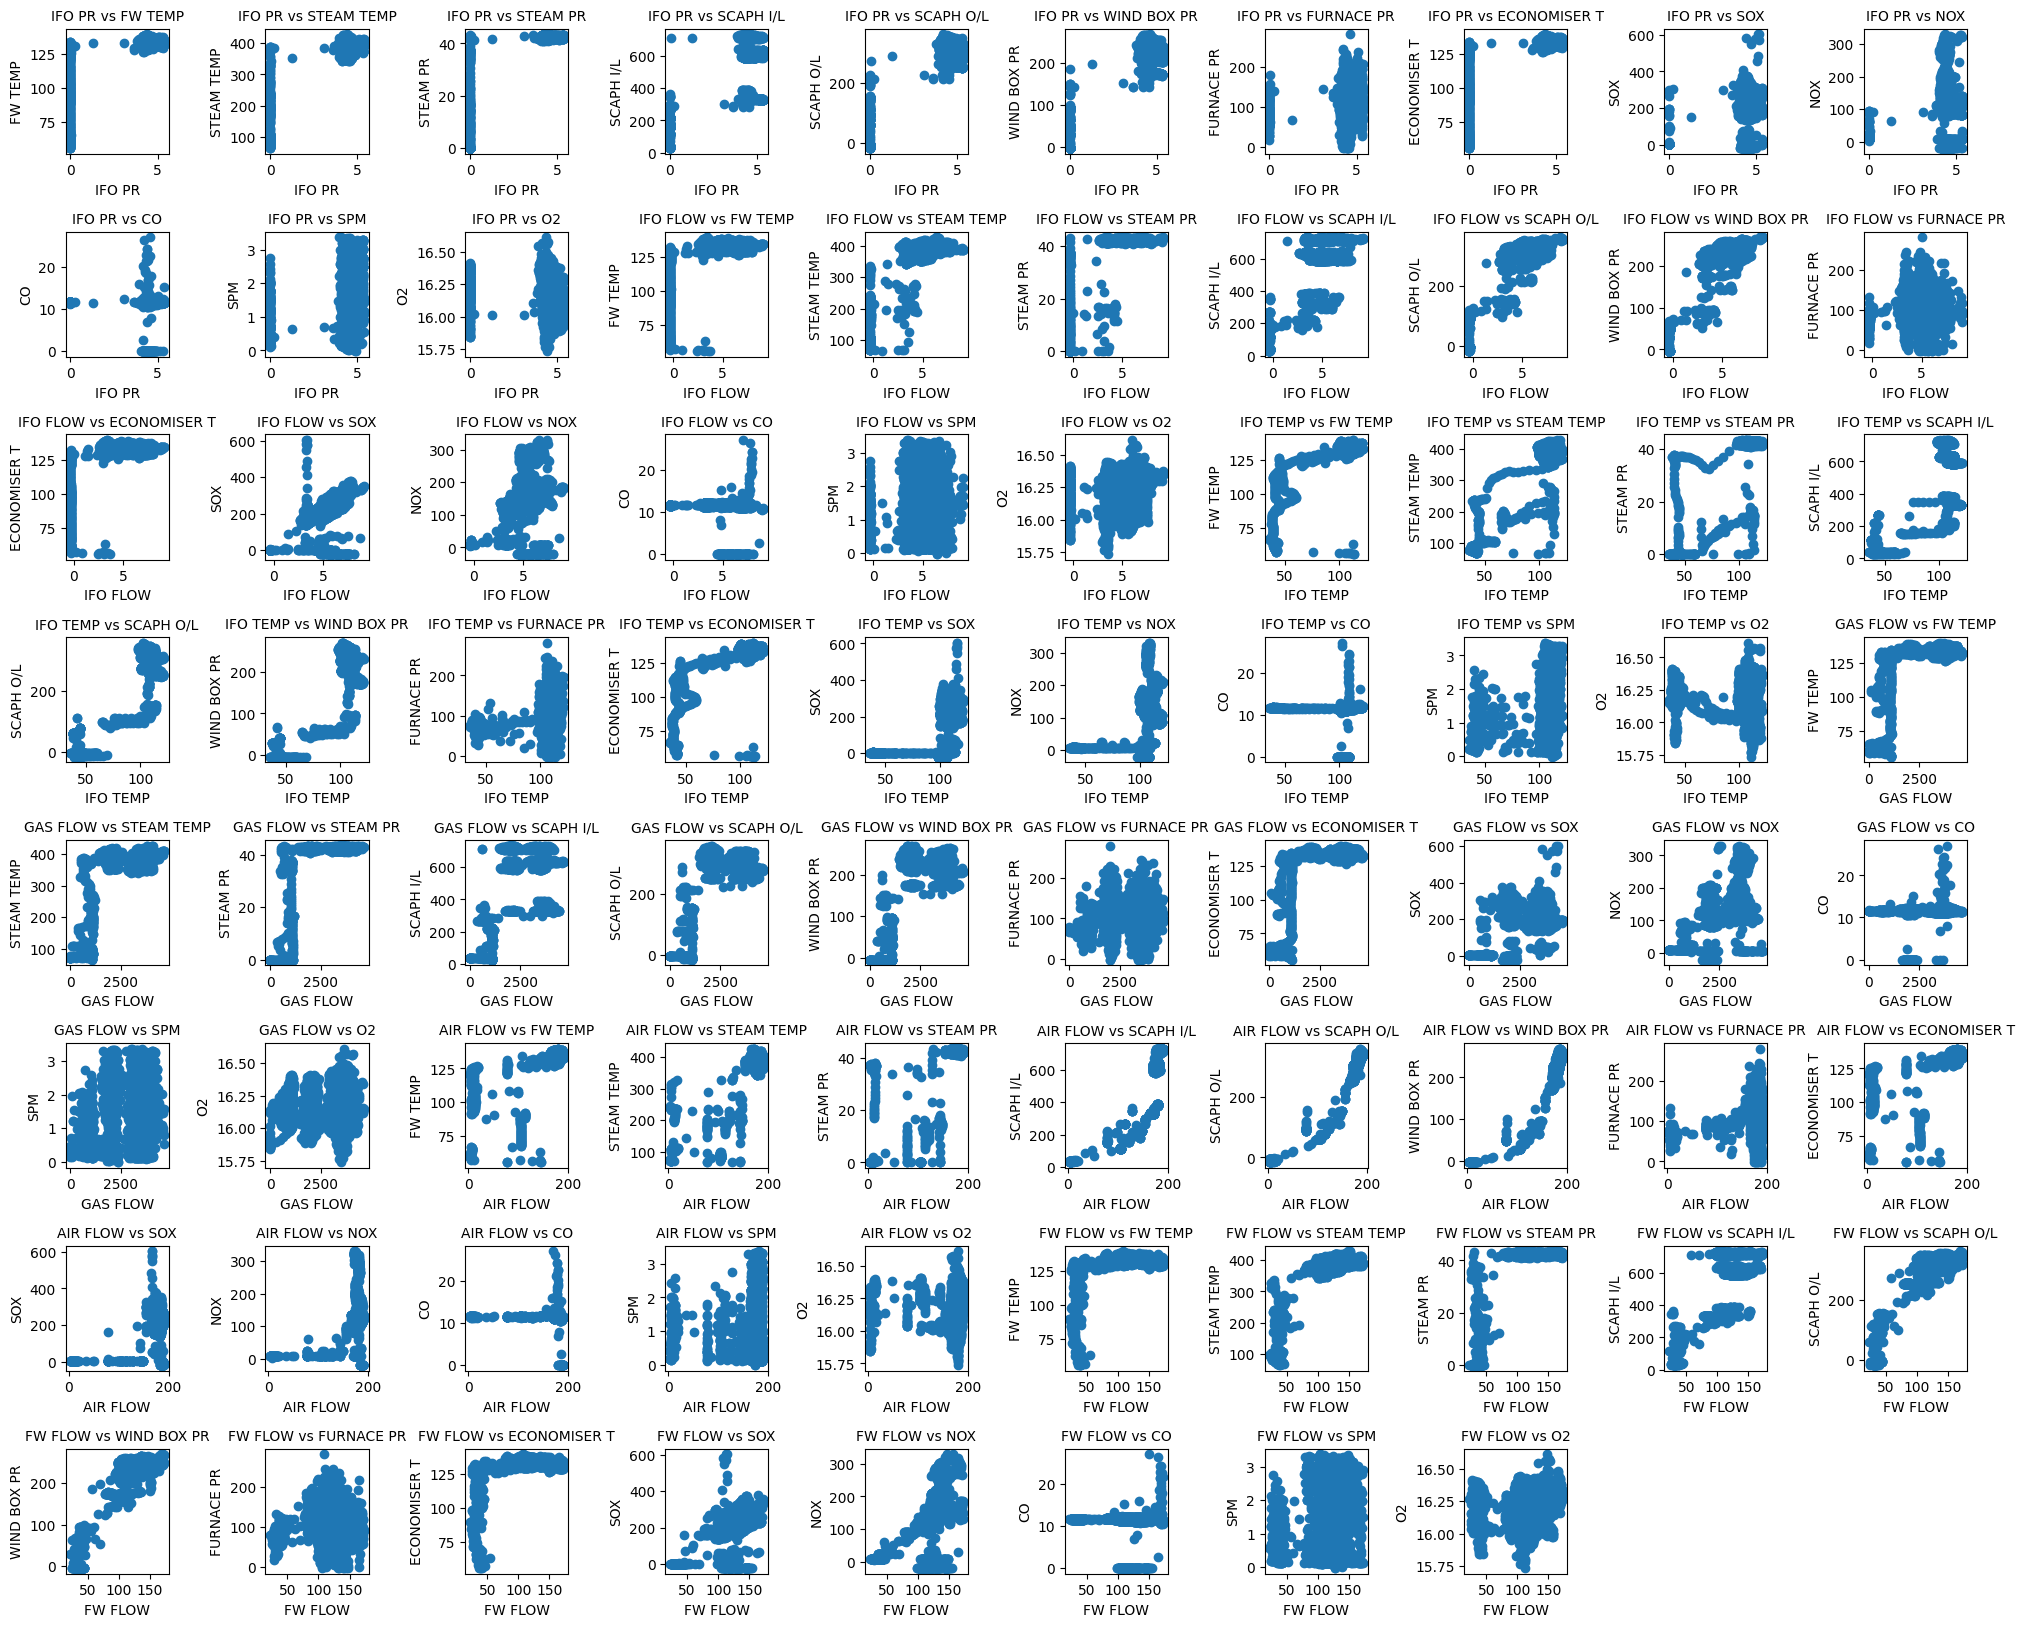

In [65]:
x_columns = ['IFO PR', 'IFO FLOW', 'IFO TEMP', 'GAS FLOW', 'AIR FLOW', 'FW FLOW', 'STEAM FLOW']
y_columns = ['FW TEMP', 'STEAM TEMP', 'STEAM PR', 
             'SCAPH I/L', 'SCAPH O/L', 'WIND BOX PR', 'FURNACE PR', 
             'ECONOMISER T', 'SOX', 'NOX', 'CO', 
             'SPM', 'O2']

# Generate all combinations of the specified x and y columns
column_combinations = list(product(x_columns, y_columns))

# Determine the grid size for subplots
num_plots = len(column_combinations)
grid_size = int(num_plots**0.5) + (1 if int(num_plots**0.5)**2 < num_plots else 0)

# Create subplots
fig, axes = plt.subplots(grid_size, grid_size, figsize=(20, 20))
axes = axes.flatten()

# Font size for labels and titles
font_size = 10

# Plot each combination
for i, (col1, col2) in enumerate(column_combinations):
    try:
        axes[i].scatter(averaged_df[col1],averaged_df[col2])
        axes[i].set_xlabel(col1, fontsize=font_size)
        axes[i].set_ylabel(col2, fontsize=font_size)
        axes[i].set_title(f'{col1} vs {col2}', fontsize=font_size)
        axes[i].tick_params(axis='both', labelsize=font_size)
    except KeyError as e:
        print(f"KeyError: {e} - Skipping plot for {col1} vs {col2}")
        fig.delaxes(axes[i])
    except Exception as e:
        print(f"Exception: {e} - Skipping plot for {col1} vs {col2}")
        fig.delaxes(axes[i])

# Hide any unused subplots
for j in range(i + 1, grid_size * grid_size):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

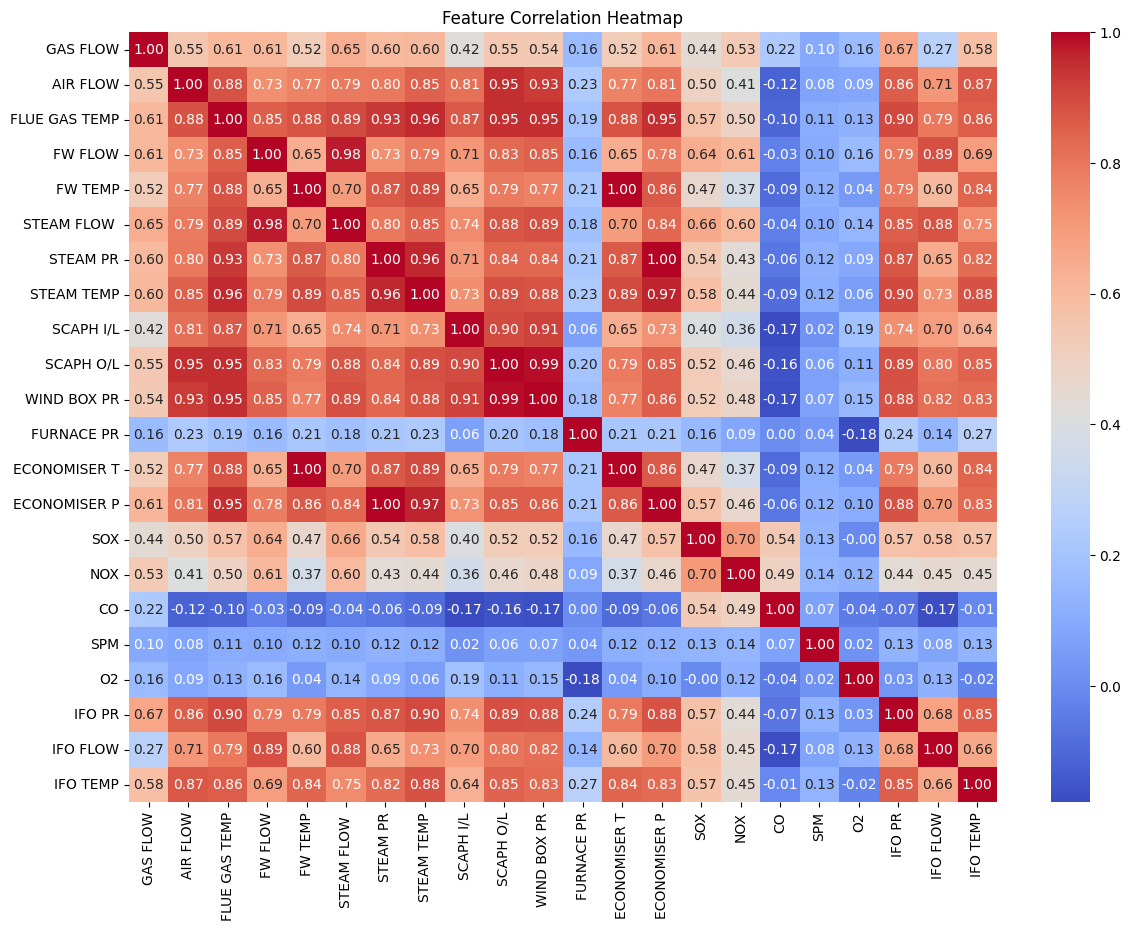

In [66]:

#Heat Map
selected_columns=df.iloc[:,:]
correlation_matrix = selected_columns.corr()
plt.figure(figsize=(14, 10))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Show plot
plt.title('Feature Correlation Heatmap')
plt.show()
